In [1]:
# run this if you don't have tensorflow-2.0x
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 1.7MB/s 
     |████████████████████████████████| 501kB 37.5MB/s 
     |████████████████████████████████| 3.1MB 24.6MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [2]:
# check the tensorflow version
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [3]:
# datasets libary installation
!pip install -q tensorflow-datasets

     |████████████████████████████████| 942kB 2.8MB/s 


In [4]:
# import datasets
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)

W0819 08:00:12.626073 140069147957120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


W0819 08:02:15.301177 140069147957120 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
train_data, test_data = imdb['train'], imdb['test']

In [0]:
tokenizer = info.features['text'].encoder

In [7]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [8]:
sample_string = 'Tensorflow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print("Tokenized String is: {}".format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print("Original String is: {}".format(original_string))

Tokenized String is: [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
Original String is: Tensorflow, from basics to mastery


In [9]:
for ts in tokenized_string:
    print('{}------>{}'.format(ts, tokenizer.decode([ts])))

6307------>Ten
2327------>sor
2934------>flow
2------>, 
48------>from 
4249------>basi
4429------>cs 
7------>to 
2652------>master
8050------>y


In [10]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 10
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(train_data, epochs = num_epochs, validation_data = test_data)

W0819 08:07:18.650616 140069147957120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
25000/25000 [==============================] - 469s 19ms/step - loss: 0.6853 - accuracy: 0.5345 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 236s 9ms/step - loss: 0.6831 - accuracy: 0.5416 - val_loss: 0.6839 - val_accuracy: 0.5378
Epoch 3/10
25000/25000 [==============================] - 237s 9ms/step - loss: 0.6824 - accuracy: 0.5430 - val_loss: 0.6839 - val_accuracy: 0.5388
Epoch 4/10
25000/25000 [==============================] - 235s 9ms/step - loss: 0.6818 - accuracy: 0.5446 - val_loss: 0.6841 - val_accuracy: 0.5393
Epoch 5/10
25000/25000 [==============================] - 239s 10ms/step - loss: 0.6814 - accuracy: 0.5453 - val_loss: 0.6844 - val_accuracy: 0.5391
Epoch 6/10
25000/25000 [==============================] - 237s 9ms/step - loss: 0.6812 - accuracy: 0.5463 - val_loss: 0.6846 - val_accuracy: 0.5390
Epoch 7/10
25000/25000 [==============================] - 237s 9ms/step - loss: 0.6810 - accuracy: 0.5

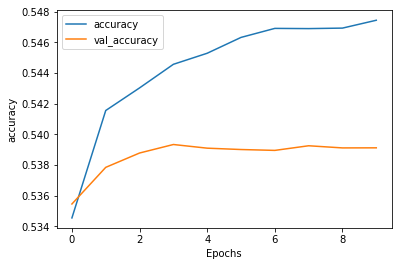

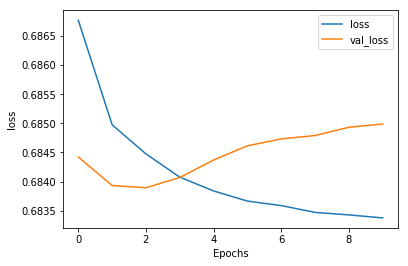

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(histroy, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')